# Zoomcamp MLOps Course Cohort 2024 Week 02 Homework
*Version:* `1.2` *(Jupytext, time measurements, logger, param notebook execution, fixes)*

<a name="ToC"></a>
# Table of Content

- [Notebook Description](#0)
- [General Settings](#1)
    - [Paths](#1-1)
    - [Notebook Functionality and Appearance](#1-2)
    - [External Libraries](#1-3)
    - [Internal Code](#1-4)
    - [Constants](#1-5)   
- [Analysis](#2)   
    - [Data Reading](#2-1)   
    - [Questions](#2-2)
        - [Q1 Install MLflow](#2-2-1)     
        - [Q2 Download and preprocess the data](#2-2-2)
        - [Q3 Train a model with autolog](#2-2-3)
        - [Q4 Launch the tracking server locally](#2-2-4)
        - [Q5 Tune model hyperparameters](#2-2-5)
        - [Q6 Promote the best model to the model registry](#2-2-6)
- [Final Timestamp](#3)  

<a name="0"></a>
# Notebook Description
[ToC](#ToC) 

> *Please put your comments about the notebook functionality here.*  

<a name="1"></a>
# GENERAL SETTINGS
[ToC](#ToC)  
General settings for the notebook (paths, python libraries, own code, notebook constants). 

> *NOTE: All imports and constants for the notebook settings shoud be here. Nothing should be imported in the analysis section.*

<a name="1-1"></a>
### Paths
[ToC](#ToC)  

Adding paths that are necessary to import code from within the repository.

In [1]:
import sys
import os
sys.path+=[os.path.join(os.getcwd(), ".."), os.path.join(os.getcwd(), "../..")] # one and two up

<a name="1-2"></a>
### Notebook Functionality and Appearance
[ToC](#ToC)  
Necessary libraries for notebook functionality:
- A button for hiding/showing the code. By default it is deactivated and can be activated by setting CREATE_BUTTON constant to True. 
> **NOTE: This way, using the function, the button works only in active notebook. If the functionality needs to be preserved in html export, then the code has to be incluced directly into notebook.**
- Set notebook width to 100%.
- Notebook data frame setting for better visibility.
- Initial timestamp setting and logging the start of the execution.

#### Overall Setting Specification

In [2]:
LOGGER_CONFIG_NAME = "logger_file_limit_console"
ADDAPT_WIDTH = False

#### Overall Behaviour Setting

In [3]:
try:
    from src.utils.notebook_support_functions import create_button, get_notebook_name
    NOTEBOOK_NAME = get_notebook_name()
    SUPPORT_FUNCTIONS_READ = True
except:
    NOTEBOOK_NAME = "NO_NAME"
    SUPPORT_FUNCTIONS_READ = False  

In [4]:
from src.utils.logger import Logger
from src.utils.envs import Envs
from src.utils.config import Config
from pandas import options
from IPython.display import display, HTML

In [5]:
options.display.max_rows = 500
options.display.max_columns = 500
envs = Envs()
envs.set_logger(LOGGER_CONFIG_NAME)
Logger().start_timer(f"NOTEBOOK; Notebook name: {NOTEBOOK_NAME}")
if ADDAPT_WIDTH:
    display(HTML("<style>.container { width:100% !important; }</style>")) # notebook width

2024-05-24 12:41:26,329 - file_limit_console - INFO - Logger was created on WS-3000 in branche 002_do_week_02_hw.
2024-05-24 12:41:26,330 - file_limit_console - INFO - Process: NOTEBOOK; Notebook name: W02_HW.ipynb; Timer started;


In [6]:
# create_button()

<a name="1-3"></a>
### External Libraries
[ToC](#ToC)  

In [7]:
from datetime import datetime

import mlflow

from IPython.display import display, HTML, Image

<a name="1-4"></a>
### Internal Code
[ToC](#ToC)  
Code, libraries, classes, functions from within the repository.

In [8]:
from src.utils.date_time_functions import create_datetime_id

<a name="1-5"></a>
### Constants
[ToC](#ToC)  
Constants for the notebook.

> *NOTE: Please use all letters upper.*

#### General Constants
[ToC](#ToC)  

In [9]:
# from src.global_constants import *  # Remember to import only the constants in use
N_ROWS_TO_DISPLAY = 2
FIGURE_SIZE_SETTING = {"autosize": False, "width": 2200, "height": 750}
DATA_PROCESSING_CONFIG_NAME = "data_processing_basic"

#### Constants for Setting Automatic Run
[ToC](#ToC)  

In [10]:
# MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION #########################################
PYTHON_CONFIG_NAME = "python_local"
ID = create_datetime_id(now=datetime.now(), add_micro=False)
# (END) MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION ###################################

#### Python Config Initialisation
[ToC](#ToC)  

In [11]:
envs.set_config(PYTHON_CONFIG_NAME)

#### Notebook Specific Constants
[ToC](#ToC)  

<a name="2"></a>
# ANALYSIS
[ToC](#ToC)  

<a name="2-1"></a>
## Data Reading
[ToC](#ToC)  

In [12]:
Logger().set_meantime("Chapter one")

2024-05-24 12:41:26,877 - file_limit_console - INFO - Process: NOTEBOOK; Notebook name: W02_HW.ipynb; Timer meantime; Meantime of: Chapter one; Duration [s]: 0.55; Duration [m]: 0.01


<a name="2-2"></a>
## Questions
[ToC](#ToC)  

<a name="2-2-1"></a>
### Q1 Install MLflow
[ToC](#ToC)  

To get started with MLflow you'll need to install the MLflow Python package.

For this we recommend creating a separate Python environment, for example, you can use conda environments, and then install the package there with pip or conda.

Once you installed the package, run the command mlflow --version and check the output.

What's the version that you have?'

In [13]:
answer = f"Installed Version of MLFlow is: {mlflow.__version__}"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-2"></a>
### Q2 Download and preprocess the data
[ToC](#ToC)  

We'll use the [Green Taxi Trip Records](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) dataset to predict the duration of each trip.

Download the data for January, February and March 2023 in parquet format from here.

Use the script preprocess_data.py located in the folder homework to preprocess the data.

The script will:

load the data from the folder <TAXI_DATA_FOLDER> (the folder where you have downloaded the data),
fit a DictVectorizer on the training set (January 2023 data),
save the preprocessed datasets and the DictVectorizer to disk.
Your task is to download the datasets and then execute this command:

python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output
Tip: go to 02-experiment-tracking/homework/ folder before executing the command and change the value of <TAXI_DATA_FOLDER> to the location where you saved the data.

How many files were saved to OUTPUT_FOLDER?

1  
3  
4  
7  

~~~
python preprocess_data.py --raw_data_path E:/DATA/external --dest_path ./output
~~~

In [14]:
answer = f"The number of files in output folder is: {4}"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-3"></a>
### Q3 Train a model with autolog
[ToC](#ToC)  

We will train a RandomForestRegressor (from Scikit-Learn) on the taxi dataset.

We have prepared the training script train.py for this exercise, which can be also found in the folder homework.

The script will:

load the datasets produced by the previous step,
train the model on the training set,
calculate the RMSE score on the validation set.
Your task is to modify the script to enable autologging with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked.

Tip 1: don't forget to wrap the training code with a with mlflow.start_run(): statement as we showed in the videos.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

What is the value of the min_samples_split parameter:

2  
4  
8  
10  

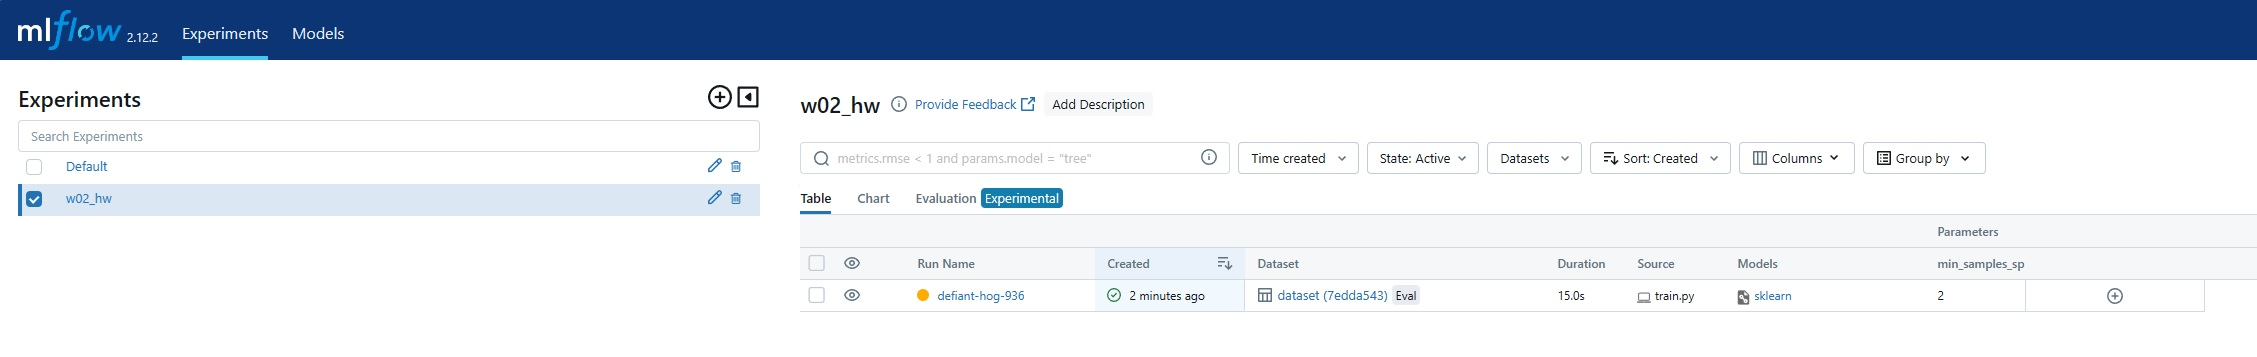

In [15]:
display(Image(filename="W02_Q3.png"))

In [16]:
answer = f"The value of the min_sample_split param is: {2}"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-4"></a>
### Q4 Launch the tracking server locally
[ToC](#ToC)  

Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry.

Your task is to:

launch the tracking server on your local machine,
select a SQLite db for the backend store and a folder called artifacts for the artifacts store.
You should keep the tracking server running to work on the next two exercises that use the server.

In addition to backend-store-uri, what else do you need to pass to properly configure the server?

default-artifact-root  
serve-artifacts  
artifacts-only  
artifacts-destination  

Running the server
~~~
mlflow server \
    --backend-store-uri sqlite:///mlflow.db \
    --default-artifact-root ./artifacts \
    --host 0.0.0.0
~~~

In [17]:
answer = "The following has to be added to properly configure the server: default-artifact-root"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-5"></a>
### Q5 Tune model hyperparameters
[ToC](#ToC)  

Now let's try to reduce the validation error by tuning the hyperparameters of the RandomForestRegressor using hyperopt. We have prepared the script hpo.py for this exercise.

Your task is to modify the script hpo.py and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the objective function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called random-forest-hyperopt to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

the list of hyperparameters that are passed to the objective function during the optimization,
the RMSE obtained on the validation set (February 2023 data).
What's the best validation RMSE that you got?

4.817  
5.335  
5.818  
6.336  

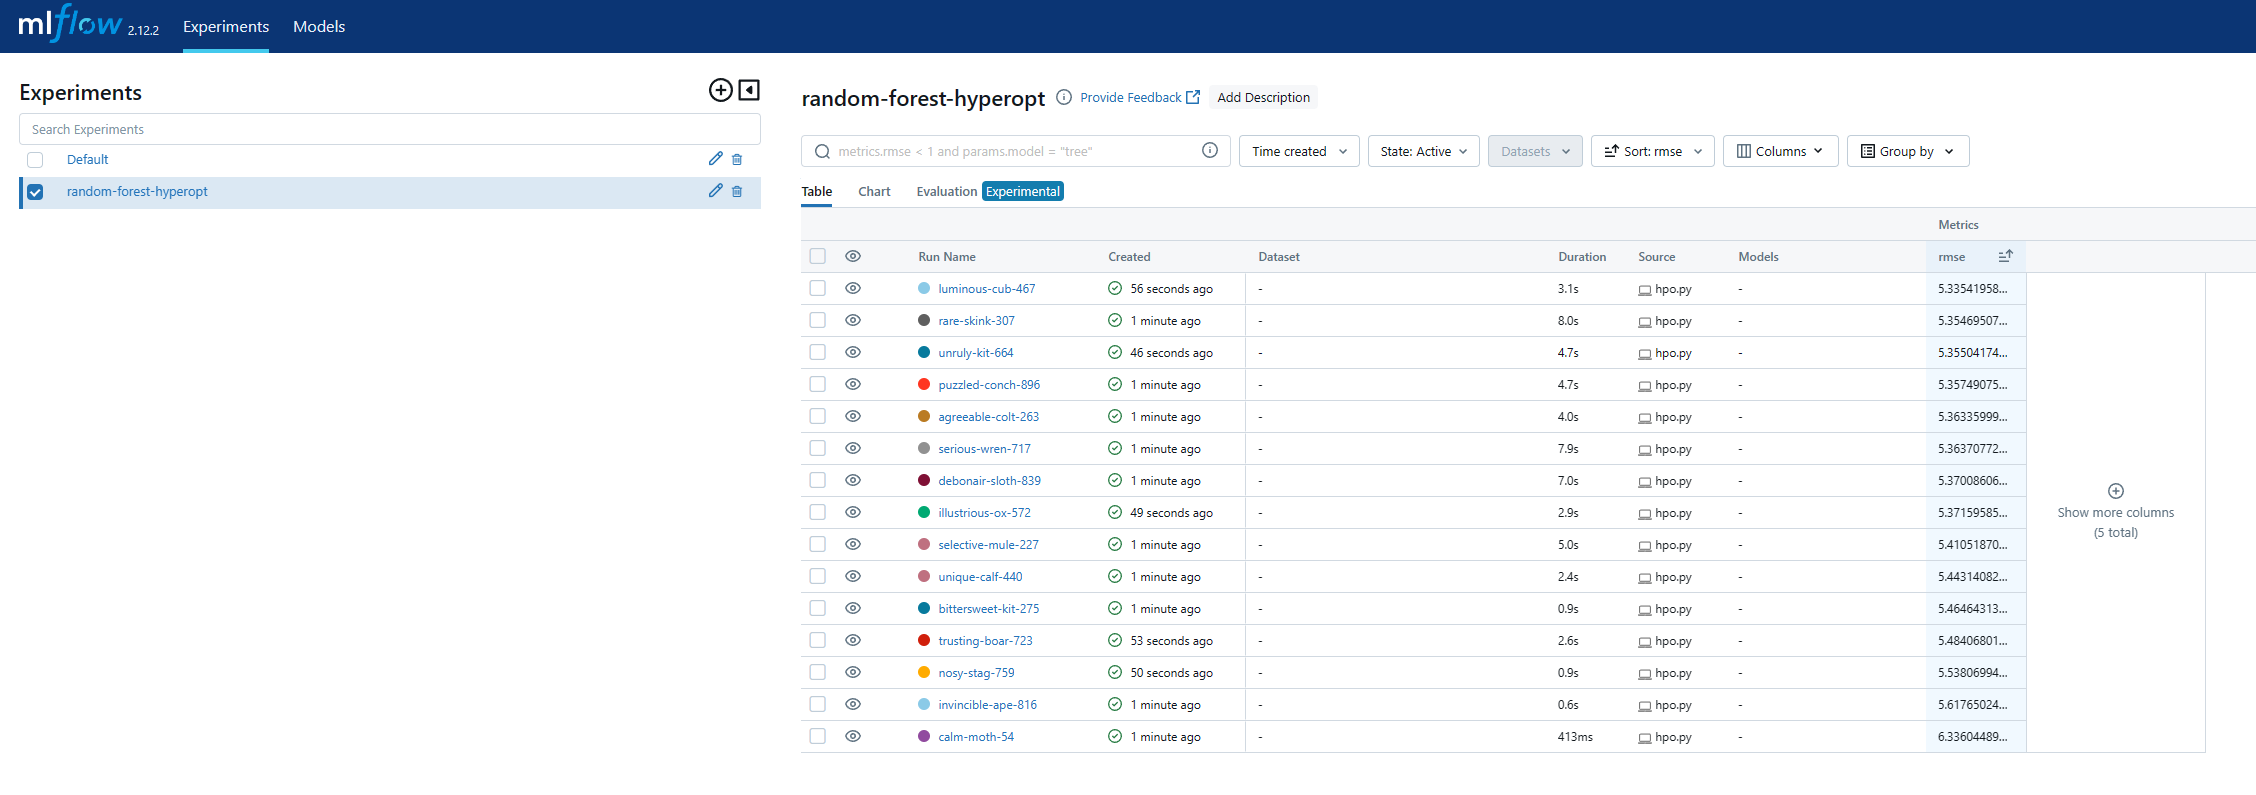

In [18]:
display(Image(filename="W02_Q5.png"))

In [19]:
answer = f"The best model RMSE is : 5.335"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-6"></a>
### Q6 Promote the best model to the model registry
[ToC](#ToC)  

The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. In this exercise, you'll promote the best model to the model registry. We have prepared a script called register_model.py, which will check the results from the previous step and select the top 5 runs. After that, it will calculate the RMSE of those models on the test set (March 2023 data) and save the results to a new experiment called random-forest-best-models.

Your task is to update the script register_model.py so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tip 1: you can use the method search_runs from the MlflowClient to get the model with the lowest RMSE,

Tip 2: to register the model you can use the method mlflow.register_model and you will need to pass the right model_uri in the form of a string that looks like this: "runs:/<RUN_ID>/model", and the name of the model (make sure to choose a good one!).

What is the test RMSE of the best model?

5.060  
5.567  
6.061  
6.568  

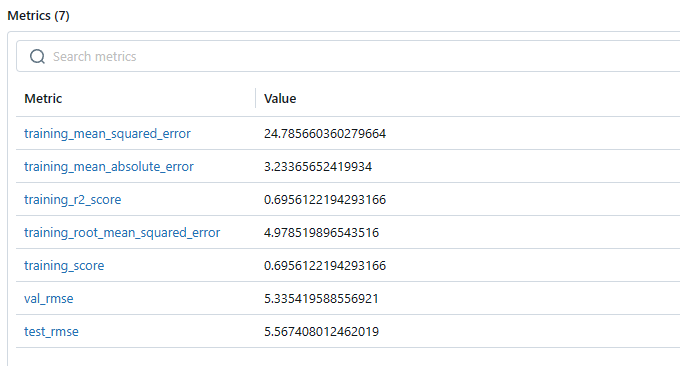

In [20]:
display(Image(filename="W02_Q6.png"))

In [21]:
answer = f"The promoted model test RMSE : 5.567"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="3"></a>
# Final Timestamp
[ToC](#ToC)  

In [22]:
Logger().end_timer()

2024-05-24 12:41:27,032 - file_limit_console - INFO - Process: NOTEBOOK; Notebook name: W02_HW.ipynb; Timer ended; Process Duration [s]: 0.7; Process Duration [m]: 0.01
